box areas [ 200  400 4200 1575 -500   75]
array_index [4 5 0 1 3 2]
clusters [[  5   5  10  20]
 [ 10  20  30  30]
 [ 30  30  50  50]
 [ 20  35  55  80]
 [100 100  30  40]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
pre_cluster [[  5   5  10  20]
 [ 10  20  30  30]
 [ 25  65  40  50]
 [ 20  35  55  80]
 [100 100  30  40]]
pre_cluster [[  5   5  10  20]
 [ 10  20  30  30]
 [ 20 100  30  50]
 [ 25  32  52  65]
 [100 100  30  40]]
앵커 박스 크기와 종횡비" : [[  5   5  10  20]
 [ 10  20  30  30]
 [ 20 100  30  50]
 [ 25  32  52  65]
 [100 100  30  40]]


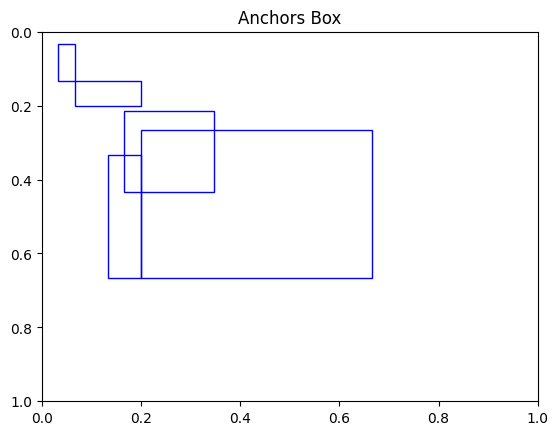

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -- k-means clustering
def kmeans(boxes, k, num_iter=100):
    box_areas = (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])
    print(f'box areas {box_areas}')
    array_index = np.argsort(box_areas) 

    ''' 배열 위치 확인 ex) a = np.array([3, 1, 2]), 
        np.argsort(a) >>> [1, 2, 0] 가장 작은 숫자부터 순서대로 배열 나열 '''

    # -- Select the largest k-box
    clusters = boxes[array_index[-k:]]
    print(f'array_index {array_index}')
    print(f'clusters {clusters}')

    pre_cluster = np.zeros_like(clusters)
    print(pre_cluster)
    # 이 함수는 주어진 배열과 동일한 구조를 가지는 초기화되지 않은 배열을 생성할 때 유용하게 사용될 수 있습니다.

    # np.argmin 최솟값 인덱스
    # np.unravel_index 최솟값의 인덱스를 튜플 형태로 표현
    # np.any True/False
    # np.all 전부 True/False인지 확인
    # np.abs 절댓값 (실수, 복소수 전부 반환)

    for _ in range(num_iter):
        box_clusters = np.argmin(((boxes[:, None] - clusters[None]) ** 2).sum(axis=2), axis=1)
        
        '''np.argmin는 최솟값 인덱스로 가장 가까운 거리에 있는 것을 선택하고, boxes[:, None]은 1의 인덱스 자리에 있는 차원 추가, np.newaxis와 동일한 의미
           sum(axis=2) 다시 2차원 반환하여 계산 '''
        
        for clusters_idx in range(k):
            if np.any(box_clusters == clusters_idx):
                clusters[clusters_idx] = boxes[box_clusters == clusters_idx].mean(axis=0)

        # -- threshold convergence
        if np.all(np.abs(pre_cluster - clusters) < 1e-6):
            break

        pre_cluster = clusters.copy()
        print(f'pre_cluster {pre_cluster}')
    return clusters

def plot_boxes(boxes, title="Anchors Box"):
    fig, ax = plt.subplots(1)
    ax.set_title(title)

    # -- orgin image size
    img_width, img_height = 150, 150

    for box in boxes:
        x1, y1, x2, y2 = box
        x1_, y1_ = x1 / img_width, y1 / img_height
        x2_, y2_ = x2 / img_width, y2 / img_height

        width, height = x2_ - x1_ , y2_ - y1_
        rect = patches.Rectangle((x1_, y1_), width, height, linewidth=1, edgecolor='b',
                                 facecolor = "none")

        ax.add_patch(rect)
    
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.invert_yaxis()
    plt.show()

boxes = np.array([[10, 20, 30, 30], [30, 30, 50, 50], [100, 100, 30, 40],
                  [20, 35, 55, 80], [20, 100, 30, 50], [5, 5, 10, 20]])
# print(boxes)

k = 5

anchor_boxes = kmeans(boxes, k)
print(f'앵커 박스 크기와 종횡비" : {anchor_boxes}')
plot_boxes(anchor_boxes)

# preprocessing
# center-point
# Feature map > Network



# 0721
